In [33]:
import requests,json
'''设置中文字体'''


In [72]:
def counPage(tid):
    '''
    :return: 视频总页数
    '''
    url = 'https://api.bilibili.com/archive_rank/getarchiverankbypartion?jsonp=jsonp&tid={tid}&pn={page}'.format(
        tid=tid, page=1)
    headers = {}
    response = requests.get(url, headers=headers)
    json_ = json.loads(response.text)
    count = json_["data"]["page"]["count"]
    return count

def get_tid():
    with open ("分类.json",encoding='utf8') as f:
        tid_json=f.read()
        tid_dict=json.loads(tid_json)
        
        big_list=[]
        for i in tid_dict['data']:
            #大分类
            big={}
            if (i['tid'] !='')and (i['sub'] != []):
                big['name']=i['name']
                li=[]
                total=0
            # 小分类
                for n in i['sub']:

                    if 'tid' in n:
                        det = {}
                        det['subname'] = n['name']
                        det['count'] = counPage(n['tid'])
                        total+=int(det['count'])
                        li.append(det)
                        # detail_kind.append(det)
                        # print('({}){} {}'.format(i['name'],n['name'],n['tid']))
                big['list'] = li
                big['total'] = total
                big_list.append(big)

        return big_list
big_list=get_tid()

## 大分类下的数据展示

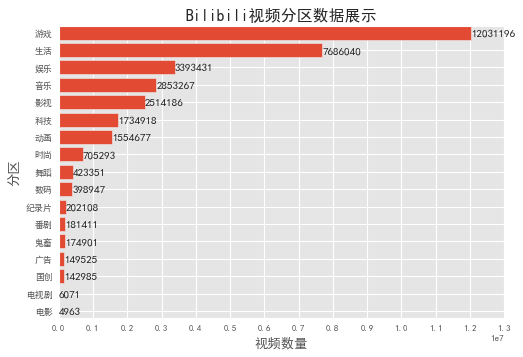

In [150]:

import matplotlib
plt.style.use('ggplot')
matplotlib.rcParams['font.family']='SimHei'
matplotlib.rcParams['font.style']='normal'
matplotlib.rcParams['font.size']=10
import matplotlib.pyplot as plt
dictq=big_list

dictr={}
for i in dictq:
    dictr[i['name']]=i['total']
q=sorted(dictr.items(),key=lambda item:item[1])
#  

b=plt.barh([x[0] for x in q], [y[1] for y in q])

for rect in b:
    w=rect.get_width()
    plt.text(w,rect.get_y()+rect.get_height()/2,'%d'%int(w),ha='left',va='center')

plt.xlim((0,13000000))
plt.xticks([x*1000000 for x in range(0,14)])
plt.ylabel('分区')
plt.xlabel('视频数量')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Bilibili视频分区数据展示')
# plt.show()
plt.savefig('big.png',dpi=300,bbox_inches='tight')

## 详细分类下的数据展示

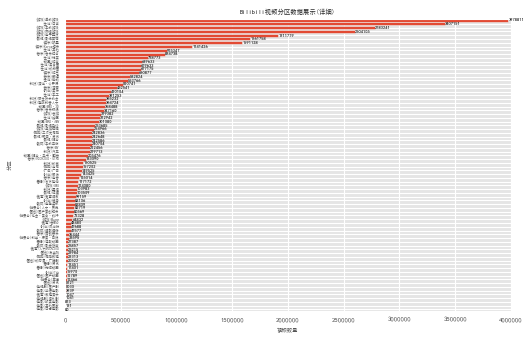

In [152]:
import matplotlib
plt.style.use("ggplot")
matplotlib.rcParams['font.family']='SimHei'
matplotlib.rcParams['font.style']='normal'
matplotlib.rcParams['font.size']=4
import matplotlib.pyplot as plt
dictq=big_list
#
dictr={}
for i in dictq:
    
    for n in i['list']:
        dictr['({}){}'.format(i['name'],n['subname'])]=n['count']
        
        
q=sorted(dictr.items(),key=lambda item:item[1])
#  

b=plt.barh([x[0] for x in q], [y[1] for y in q])

for rect in b:
    w=rect.get_width()
    plt.text(w,rect.get_y()+rect.get_height()/2,'%d'%int(w),ha='left',va='center',color='black')
    
# plt.xlim((0,4300))
# plt.xticks([x*100000 for x in range(0,40)])
plt.ylabel('分区')
plt.xlabel('视频数量')
plt.xticks(fontsize=6)
plt.yticks(fontsize=3)
plt.title('Bilibili视频分区数据展示(详细)')
# plt.show(dpi=500)
plt.savefig('detail.jpg', dpi=1080,bbox_inches='tight')